O script realiza a análise de sentimentos de avaliações extraídas de um arquivo JSON, garantindo a integridade dos dados ao tratar erros de carregamento e remover duplicatas. As avaliações são organizadas em um DataFrame Pandas, permitindo verificar a distribuição dos sentimentos e identificar padrões nos dados. A análise inclui a contagem e visualização das notas (ratings) para entender a percepção geral dos usuários. Gráficos são gerados para ilustrar a frequência das avaliações e auxiliar na interpretação dos sentimentos. Por fim, exemplos de avaliações positivas e negativas são exibidos para destacar diferenças no tom e no conteúdo dos comentários.

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho do arquivo JSON
caminho_json = r"/content/ChatGPT_Reviews_Sentimentos.json"

try:
    with open(caminho_json, "r", encoding="utf-8") as f:
        dados = json.load(f)
except json.JSONDecodeError as e:
    print(f"Erro ao decodificar JSON: {e}")

    # Imprimir a linha e coluna onde o erro ocorreu
    print(f"Linha: {e.lineno}, Coluna: {e.colno}")

    with open(caminho_json, "r", encoding="utf-8") as f:
        conteudo = f.readlines()
        if 0 <= e.lineno - 1 < len(conteudo):
            print(f"Conteúdo problemático: {conteudo[e.lineno - 1]}")


    exit(1)


df = pd.DataFrame(dados)

print("\n📌 Primeiras linhas do dataset:")
print(df.head())

total_reviews = len(df)
print(f"\n📊 Total de avaliações: {total_reviews}")

print("\n🔍 Valores nulos por coluna:")
print(df.isnull().sum())


duplicadas = df.duplicated().sum()
print(f"\n⚠️ Avaliações duplicadas: {duplicadas}")
df.drop_duplicates(inplace=True)

duplicadas_apos = df.duplicated().sum()
print(f"\n✅ Avaliações duplicadas removidas. Restantes: {duplicadas_apos}")



print("\n📊 Distribuição das Notas (Ratings):")
print(df["Ratings"].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(x=df["Ratings"], palette="viridis")
plt.xlabel("Notas (Ratings)")
plt.ylabel("Quantidade")
plt.title("Distribuição das Notas")
plt.show()


print("\n✅ Exemplos de avaliações POSITIVAS:")
print(df[df["Sentimento"] == "Positivo"][["Review", "Ratings"]].head(5))

print("\n❌ Exemplos de avaliações NEGATIVAS:")
print(df[df["Sentimento"] == "Negativo"][["Review", "Ratings"]].head(5))


: 

<ipython-input-4-2404a2bc9a33>:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df["Review"].str.contains(r"\b(not|no) good\b", case=False, na=False))


🔍 Avaliações negativas contendo 'not good' ou 'no good':

119                                not good
3733                               not good
5653                             not good ❌
8110                         not good still
8740                               not good
10127    it is not good for being gneration
10265                           no not good
11674                not good but excellent
11721            The chat limit is not good
11839                      not good answers
Name: Review, dtype: object
🔍 Avaliações negativas contendo a palavra 'good':

16      It used to be good but now the app keeps sayin...
108                                     good but not best
119                                              not good
150                  This app is good but it is not great
172     This is good app for students but this is not ...
189                           good for cheating in school
243     These new voices SUCK. Cove was so good and no...
1798    It's a go

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


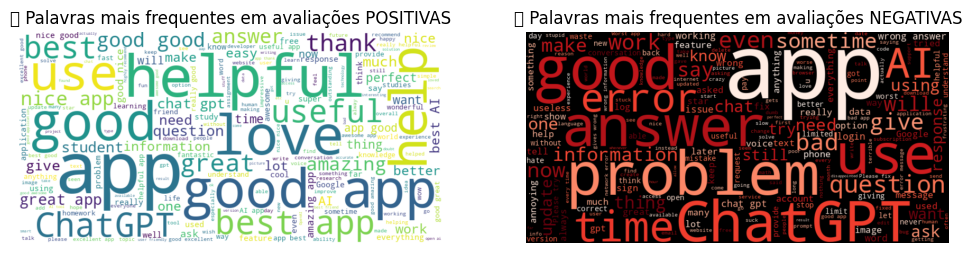

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import json


# Caminho do arquivo JSON gerado na análise anterior
caminho_json = r"/content/ChatGPT_Reviews_Sentimentos.json"

with open(caminho_json, "r", encoding="utf-8") as f:
    dados = json.load(f)

df = pd.DataFrame(dados)


# Filtrar frases que possuem "not good" ou "no good"
avaliacoes_filtradas = df[
    (df["Sentimento"] == "Negativo") &
    (df["Review"].str.contains(r"\b(not|no) good\b", case=False, na=False))
]

print("🔍 Avaliações negativas contendo 'not good' ou 'no good':\n")
print(avaliacoes_filtradas["Review"].head(10))

texto_positivo = " ".join(df[df["Sentimento"] == "Positivo"]["Review"].dropna())
texto_negativo = " ".join(df[df["Sentimento"] == "Negativo"]["Review"].dropna())
avaliacoes_com_good = df[(df["Sentimento"] == "Negativo") & (df["Review"].str.contains(r"\bgood\b", case=False, na=False))]

print("🔍 Avaliações negativas contendo a palavra 'good':\n")
print(avaliacoes_com_good["Review"].head(10))


# Criar a nuvem de palavras para avaliações positivas
plt.figure(figsize=(12, 5))
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(texto_positivo)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("🔹 Palavras mais frequentes em avaliações POSITIVAS")
print(f"Tamanho do texto negativo: {len(texto_negativo)}")
if len(texto_negativo) == 0:
    print("⚠️ O texto das avaliações negativas está vazio! A nuvem de palavras não será gerada.")
else:
    wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(texto_negativo)
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_neg, interpolation="bilinear")
    plt.axis("off")
    plt.title("🔻 Palavras mais frequentes em avaliações NEGATIVAS")


# Criar a nuvem de palavras para avaliações negativas
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(texto_negativo)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("🔻 Palavras mais frequentes em avaliações NEGATIVAS")

plt.show()
